## About
Set-up toy example of connected network (i.e. 1 connected component) and compare LINK vs. ReFeX performance as we recursively remove edges. This in part is motivated by the role of 'bridging actors' in the ideal points literature.

In [1]:
from __future__ import division
import community
import os
import re
import itertools
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
folder_directory =os.getcwd()
from sklearn.model_selection import ShuffleSplit
os.chdir(folder_directory)
exec(open('./functions/python_libraries.py').read())
exec(open('./functions/LINK_revised.py').read())
np.seterr(divide='ignore', invalid='ignore')
from sklearn.ensemble import BaggingClassifier # needed for logforest
#exec(open('./functions/LINK.py').read())
exec(open('./functions/parsing.py').read())  # Sam Way's Code
exec(open('./functions/mixing.py').read()) # Sam Way's Code
exec(open('./functions/create_adjacency_matrix.py').read())
np.seterr(divide='ignore', invalid='ignore')
fb100_file = '/Users/kristen/Dropbox/gender_graph_data/FB_processing_pipeline/data/0_original/'
import imblearn
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
adj_matrix_gender = np.load('../../data/AmherstAdj.npy')

In [3]:
gender_y = np.load('../../data/Amherstgender.npy')

In [4]:
gender_y

array([2, 1, 1, ..., 2, 2, 2])

In [5]:
adj_matrix_gender

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
G = nx.from_numpy_matrix(adj_matrix_gender)

In [7]:
adj_matrix_gender_remove = adj_matrix_gender.copy()

In [8]:
bridge_edge_locator = []
for edge in nx.bridges(G):
    print(edge)
    adj_matrix_gender_remove[edge[0],edge[1]] = 0
    adj_matrix_gender_remove[edge[1],edge[0]] = 0
    #print(adj_matrix_gender[edge[0],edge[1]])
    #print(adj_matrix_gender[edge[1],edge[0]])
    #print('')
    bridge_edge_locator.append(edge)

(56, 966)
(60, 105)
(132, 608)
(138, 1978)
(182, 239)
(191, 391)
(224, 1160)
(243, 692)
(270, 1280)
(270, 2022)
(369, 1043)
(405, 1720)
(566, 1702)
(596, 1113)
(648, 877)
(721, 1258)
(852, 1702)
(894, 1800)
(1005, 1953)
(1301, 1592)
(1467, 1791)


In [9]:
# Compare LINK, and ReFeX
percent_initially_unlabelled = [0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.9,0.85,0.8,0.75]#,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [13]:
from sklearn import linear_model
from sklearn import metrics
C_vals = [10**x for x in range(-10,100)]
(mean_accuracy_amherst, se_accuracy_amherst, 
 mean_micro_auc_amherst,se_micro_auc_amherst, mean_wt_auc_amherst_lbfgs,se_wt_auc_amherst)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender_remove), ## adjacency matrix
                                                              clf =linear_model.LogisticRegressionCV(
                                                                    Cs = C_vals,
                                                                    penalty='l2',
                                                                    solver='lbfgs',
                                                                    #class_weight='balanced',
                                                                    cv = 5, max_iter = 1000),
                                                                                                 num_iter=10) 


0.99


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaco

0.98


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.97


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.96


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
0.94
0.93
0.92
0.91
0.9
0.85
0.8
0.75


In [14]:
(mean_accuracy_amherst_all, se_accuracy_amherst_all, 
 mean_micro_auc_amherst_all,se_micro_auc_amherst_all, mean_wt_auc_amherst_lbfgs_all,se_wt_auc_amherst_all)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender), ## adjacency matrix
                                                              clf = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            #class_weight='balanced',
                            cv = 5, max_iter = 1000),
                                                                                                 num_iter=10) 



0.99


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaco

0.98


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.97


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.96


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
0.94
0.93
0.92
0.91
0.9
0.85
0.8
0.75


### Try removing edges between communities. 

In [15]:
partition = community.best_partition(G)

In [16]:
np.unique(np.array(list(partition.values())), return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([360, 273, 352, 380, 663,   4]))

In [17]:
742/2032

0.36515748031496065

In [18]:
community_df = pd.DataFrame({'keys':range(len(partition)),
             'community': np.array(list(partition.values()))})

In [19]:
# get cross community edges
np.unique(community_df.community)

array([0, 1, 2, 3, 4, 5])

In [20]:
idx0 = np.where(community_df.community==0)
idx0 = idx0[0]
idx1 = np.where(community_df.community==1)
idx1 = idx1[0]
idx2 = np.where(community_df.community==2)
idx2 = idx2[0]
idx3 = np.where(community_df.community==3)
idx3 = idx3[0]
idx4 = np.where(community_df.community==4)
idx4 = idx4[0]
idx5 = np.where(community_df.community==5)
idx5 = idx5[0]
idx6 = np.where(community_df.community==6)
idx6 = idx6[0]

In [21]:
print(np.shape(adj_matrix_gender))
print(np.shape(adj_matrix_gender[idx0,:][:,idx1]))

(2032, 2032)
(360, 273)


### Focus on Community 0 as Train Network and Community 1 as Test Network

In [22]:
adj_matrix_gender_remove2 = adj_matrix_gender.copy()

adj_matrix_gender_remove2[np.ix_(idx0, idx1)] = 0
adj_matrix_gender_remove2[np.ix_(idx1, idx0)] = 0
print(np.sum(adj_matrix_gender_remove2[np.ix_(idx0, idx1)]))
print(np.sum(adj_matrix_gender_remove2[np.ix_(idx1, idx0)]))


adj_matrix_gender_remove2[np.ix_(idx0, idx2)] = 0
adj_matrix_gender_remove2[np.ix_(idx2, idx0)] = 0


## decide whether to add here or not
adj_matrix_gender_remove2[np.ix_(idx0, idx3)] = 0
adj_matrix_gender_remove2[np.ix_(idx3, idx0)] = 0

adj_matrix_gender_remove2[np.ix_(idx0, idx4)] = 0
adj_matrix_gender_remove2[np.ix_(idx4, idx0)] = 0


adj_matrix_gender_remove2[np.ix_(idx0, idx5)] = 0
adj_matrix_gender_remove2[np.ix_(idx5, idx0)] = 0



adj_matrix_gender_remove2[np.ix_(idx1, idx2)] = 0
adj_matrix_gender_remove2[np.ix_(idx2, idx1)] = 0


adj_matrix_gender_remove2[np.ix_(idx1, idx3)] = 0
adj_matrix_gender_remove2[np.ix_(idx3, idx1)] = 0

adj_matrix_gender_remove2[np.ix_(idx1, idx4)] = 0
adj_matrix_gender_remove2[np.ix_(idx4, idx1)] = 0


adj_matrix_gender_remove2[np.ix_(idx1, idx5)] = 0
adj_matrix_gender_remove2[np.ix_(idx5, idx1)] = 0





0.0
0.0


In [24]:
percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [25]:
(mean_accuracy_amherst_sub, se_accuracy_amherst_sub, 
 mean_micro_auc_amherst_sub,se_micro_auc_amherst_sub, mean_wt_auc_amherst_lbfgs_sub,se_wt_auc_amherst_sub)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender_remove2), ## adjacency matrix
                                                              clf = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            #class_weight='balanced',
                            cv = 5, max_iter = 1000),
                                                                                                 num_iter=10) 




0.95


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9


/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


### train on one community, test on the other

In [27]:
# try varying percent of nodes labeled in a community
clf = linear_model.LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    C=10e20)

clf = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            #class_weight='balanced',
                            cv = 5, max_iter = 1000)

In [28]:
# fit model on modified network removing cross-community edges
clf.fit(adj_matrix_gender_remove2[idx0,:], np.ravel(np.array(gender_y)[idx0]))
#clf.fit(feature_x[train], np.ravel(membership_y[train]))

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000,
                         1000000, 10000000, 100000000, 1000000000, 10000000000,
                         100000000000, 1000000000000, 10000000000000,
                         100000000000000, 1000000000000000, 10000000000000000,
                         100000000000000000, 1000000000000000000,
                         10000000000000000000, ...],
                     class_weight=None, cv=5, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=1000,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [29]:
# between- community edges removed
test = idx1.copy()#np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
prob = clf.predict_proba(adj_matrix_gender_remove2[test])
print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                prob[:,1],average='weighted'))

0.5


In [30]:
clf.fit(adj_matrix_gender[idx0,:], np.ravel(np.array(gender_y)[idx0]))

test = idx1.copy() #np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]

prob = clf.predict_proba(adj_matrix_gender[test])

print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                prob[:,1],average='weighted'))

0.7670857511283043


In [31]:
## find where there were connections across communities
list(zip(*np.where(adj_matrix_gender[np.ix_(idx0, idx1)] ==1 )))[0]
#list(zip(*np.where(adj_matrix_gender_remove2[np.ix_(idx0, idx1)] ==1 )))
#pd.DataFrame(adj_matrix_gender).iloc[idx0, idx1]

(0, 95)

## Add back in direct community links

In [32]:
clf = linear_model.LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    C=10e20)

clf = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            #class_weight='balanced',
                            cv = 5, max_iter = 1000)


In [33]:
## recover edges and add back in
## list of edges between community 0 
auc_community_record_list = []
for k in range(50):
    auc_community_record = []

    adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

    counter = 0
    for j in np.random.permutation(list(zip(*np.where(adj_matrix_gender[np.ix_(idx0, idx1)] ==1 )))):        
            # randomly add edge back in
            adj_matrix_gender_remove2_add_edges_back[(idx0[j[0]], idx1[j[1]])] = 1
            adj_matrix_gender_remove2_add_edges_back[(idx1[j[1]], idx0[j[0]])] = 1

            counter = counter + 1

            if(counter % 50 == 0):
                clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                test = idx1.copy()#np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[test])
                #print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                #                                prob[:,1],average='weighted'))
                auc_community_record.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                prob[:,1],average='weighted'))

    print('***',len(auc_community_record))
    num_y = len(auc_community_record)
    ## 2) explore adding edges back in via a more targeted approach

    auc_community_record_list.append(auc_community_record)

*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59
*** 59


In [34]:
orig = np.array(np.mean(np.matrix(auc_community_record_list), 0))[0]
orig

array([0.55800344, 0.58496024, 0.58876854, 0.59403611, 0.60206748,
       0.60731893, 0.61518805, 0.62343005, 0.63151515, 0.63595207,
       0.64010531, 0.64343327, 0.6486052 , 0.64815173, 0.65461745,
       0.65714593, 0.66198259, 0.6630346 , 0.66394692, 0.67167526,
       0.67337417, 0.67700301, 0.67396733, 0.67449495, 0.67887062,
       0.68022674, 0.67343005, 0.6747464 , 0.67773265, 0.67434129,
       0.68086074, 0.6852407 , 0.69134859, 0.6931743 , 0.69156136,
       0.69411348, 0.69076725, 0.69066086, 0.69345691, 0.69494735,
       0.69727917, 0.69218354, 0.69560714, 0.69786267, 0.69746508,
       0.69889104, 0.70314206, 0.70119923, 0.69959489, 0.7034193 ,
       0.70236407, 0.70349882, 0.70616054, 0.70489469, 0.70267032,
       0.70059424, 0.69989899, 0.7000634 , 0.69683   ])

In [37]:
 import matplotlib.pyplot as plt

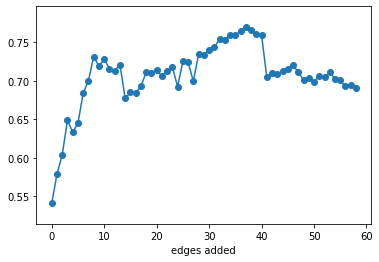

In [38]:
%matplotlib inline
plt.scatter(range(len(auc_community_record)),
           auc_community_record)
plt.plot(range(len(auc_community_record)),
           auc_community_record)


#plt.axvline(num_y, color = 'gray')
plt.xlabel('edges added')
plt.show()

In [39]:
auc_community_record_alternative = []
adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()
counter = 0

## initial fit on community 0, print auc on community 1
clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
#test = np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[idx1,:])
#print(prob)
print(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                                prob[:,1],average='weighted'))

0.5


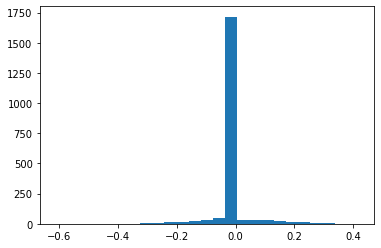

In [40]:
%matplotlib inline
plt.hist(clf.coef_[0], bins = 25)
plt.show()

In [41]:
## recover edges and add back in
## list of edges between community 0 
auc_community_record_alternative = []

adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

counter = 0

## Option A: Randomly, and exhaustively Add all Edges
idx0_permute = np.random.permutation(idx0)
idx1_permute = np.random.permutation(idx1)

#for j in idx0_permute:#zip(idx0, idx2):
#    for i in idx1_permute:
tmp = []
for j in idx0_permute:
    for i in idx1_permute:
        tmp.append((j,i))

tmp = np.random.permutation(tmp)
for j in tmp:

        adj_matrix_gender_remove2_add_edges_back[(j[0], j[1])] = 1
        adj_matrix_gender_remove2_add_edges_back[(j[1], j[0])] = 1
        counter = counter + 1
        if(counter<5000):
            if(counter % 50 == 0):
                clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                #test = np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[idx1])
                #print(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                #                                prob[:,1],average='weighted'))
                auc_community_record_alternative.append(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                                                prob[:,1],average='weighted'))



In [42]:
## recover edges and add back in
## list of edges between community 0 
auc_community_record_alternative_list = []
for k in range(50):
    auc_community_record_alternative = []

    adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

    counter = 0

    ## Option A: Randomly, and exhaustively Add all Edges
    idx0_permute = np.random.permutation(idx0)
    idx1_permute = np.random.permutation(idx1)

    #for j in idx0_permute:#zip(idx0, idx2):
    #    for i in idx1_permute:
    tmp = []
    for j in idx0_permute:
        for i in idx1_permute:
            tmp.append((j,i))

    tmp = np.random.permutation(tmp)
    for j in tmp:

            adj_matrix_gender_remove2_add_edges_back[(j[0], j[1])] = 1
            adj_matrix_gender_remove2_add_edges_back[(j[1], j[0])] = 1
            counter = counter + 1
            if(counter<5000):
                if(counter % 50 == 0):
                    clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                    #test = np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                    prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[idx1])
                    #print(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                    #                                prob[:,1],average='weighted'))
                    auc_community_record_alternative.append(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                                                    prob[:,1],average='weighted'))

    auc_community_record_alternative_list.append(auc_community_record_alternative)

In [43]:
np.shape(np.matrix(auc_community_record_alternative_list))

(50, 99)

In [44]:
len(np.mean(np.matrix(auc_community_record_alternative_list), 0))

1

In [45]:
alt = np.array(np.mean(np.matrix(auc_community_record_alternative_list), 0))[0]

In [46]:
from matplotlib.backends.backend_pdf import PdfPages



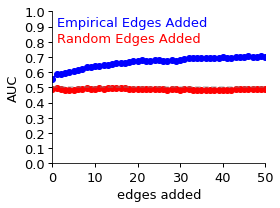

In [62]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4,3))
#plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5])

ax1.scatter(range(len(orig)),
           orig, color = 'blue')
ax1.plot(range(len(orig)),
           orig, color = 'blue')

ax1.scatter(range(len(alt)),
           alt, color = 'red')
ax1.plot(range(len(alt)),
           alt, color = 'red')
#ax1.axvline(50, color = 'blue')
ax1.set_xlabel('edges added', size = 13)
ax1.text(1,0.9, 'Empirical Edges Added', color = 'blue', size = 13)
ax1.text(1,0.8, 'Random Edges Added', color = 'red', size = 13)
ax1.set_ylabel('AUC', size = 13)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.ylim(0,1)
plt.xlim(0,50)
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)
ax1.set_yticks(np.arange(0,1.02,0.1))

plt.tight_layout()
pp = PdfPages('../../figs/ICWSM_Revise2020/simulation.pdf')
pp.savefig()
pp.close()

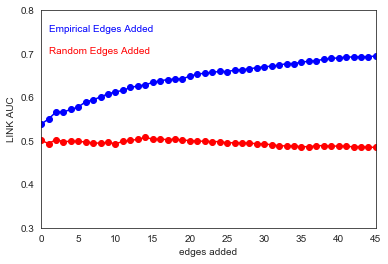

In [55]:
%matplotlib inline
plt.scatter(range(len(orig)),
           orig, color = 'blue')
plt.plot(range(len(orig)),
           orig, color = 'blue')

plt.scatter(range(len(alt)),
           alt, color = 'red')
plt.plot(range(len(alt)),
           alt, color = 'red')
plt.axvline(50, color = 'blue')
plt.xlabel('edges added')
plt.text(1,0.75, 'Empirical Edges Added', color = 'blue')
plt.text(1,0.7, 'Random Edges Added', color = 'red')
plt.ylabel('LINK AUC')

plt.ylim(0.3,0.8)
plt.xlim(0,45)
#plt.show()
pp = PdfPages('../../figs/AcrossToWithinSample.pdf')
pp.savefig()
pp.close()